In [68]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
combined_data = pd.merge(ride_data,city_data,
                                 how='outer', on='city')

# Display the data table for preview
combined_data.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


## Bubble Plot of Ride Sharing Data

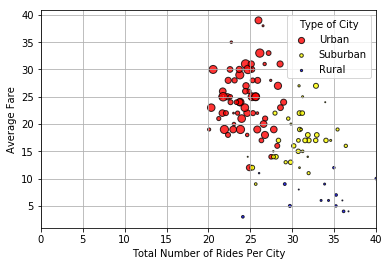

In [144]:
# Obtain the x and y coordinates for each of the three city types
urban = combined_data[combined_data["type"] == "Urban"]
suburban = combined_data[combined_data["type"] == "Suburban"]
rural = combined_data[combined_data["type"] == "Rural"]

urban_avg_fare = urban.groupby(["city"]).mean()["fare"]
urban_rides_count = urban.groupby(["city"]).count()["ride_id"]
urban_driver_count = urban.groupby(["city"]).mean()["driver_count"]

suburban_avg_fare = suburban.groupby(["city"]).mean()["fare"]
suburban_rides_count = suburban.groupby(["city"]).count()["ride_id"]
suburban_driver_count = suburban.groupby(["city"]).mean()["driver_count"]

rural_avg_fare = rural.groupby(["city"]).mean()["fare"]
rural_rides_count = rural.groupby(["city"]).count()["ride_id"]
rural_driver_count = rural.groupby(["city"]).mean()["driver_count"]

# Build the scatter plots for each city types
plt.scatter(urban_avg_fare, urban_rides_count, s=urban_driver_count, marker="o", color="red", edgecolors="black", linewidths =1,
           label = "Urban", alpha=0.8)
plt.scatter(suburban_avg_fare, suburban_rides_count, s=suburban_driver_count, marker="o", color="yellow", edgecolors="black", linewidths =1,
           label = "Suburban", alpha=0.8)
plt.scatter(rural_avg_fare, rural_rides_count, s=rural_driver_count, marker="o", color="blue", edgecolors="black", linewidths =1,
           label = "Rural", alpha=0.8)

# Incorporate the other graph properties

plt.ylabel("Average Fare")
plt.xlabel("Total Number of Rides Per City")
plt.xlim((0,40))
plt.grid(True)
# Create a legend

plt.legend(fontsize="medium", mode="Expanded", scatterpoints=1, title="Type of City")

# Incorporate a text label regarding circle size

# Save Figure
plt.savefig("data/CityData.png")
plt.show()

## Total Fares by City Type

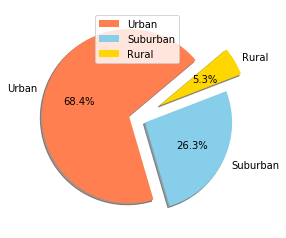

<Figure size 432x288 with 0 Axes>

In [145]:
# Calculate Type Percents
type_percent = combined_data.groupby(["type"]).count()["fare"] / combined_data["fare"].count()*100
type_percent

# Build Pie Chart
labels = ["Urban", "Suburban", "Rural"]
sizes = [68.421053, 26.315789, 5.263158]
colors = ["Coral", "SkyBlue", "Gold"]
explode = (0.1, .1, .3)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=40)


plt.legend(loc='upper center')
plt.title = '% of Total fares by city type'
plt.show()

# Save Figure
plt.savefig("data/CityDatapie.png")

## Total Rides by City Type

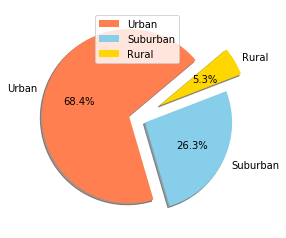

<Figure size 432x288 with 0 Axes>

In [146]:
# Calculate Ride Percents
ride_percent = combined_data.groupby(["type"]).count()["ride_id"] / combined_data["ride_id"].count()*100


# Build Pie Chart
labels = ["Urban", "Suburban", "Rural"]
sizes = [68.421053, 26.315789, 5.263158]
colors = ["Coral", "SkyBlue", "Gold"]
explode = (0.1, .1, .3)


plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=40)
plt.title = '% of Total rides by city type'
plt.legend(loc='upper center')
plt.show()
# Save Figure

plt.savefig("data/CityDatapieride.png")

## Total Drivers by City Type

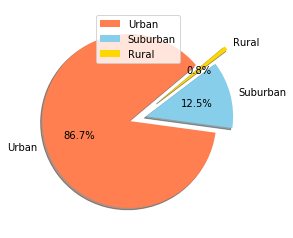

<Figure size 432x288 with 0 Axes>

In [143]:
# Calculate Driver Percents
driver_percent = combined_data.groupby(["type"]).sum()["driver_count"] / combined_data["driver_count"].sum()*100
driver_percent


# Build Pie Charts
labels = ["Urban", "Suburban", "Rural"]
sizes = [86.745550, 12.472893, 0.781557]
colors = ["Coral", "SkyBlue", "Gold"]
explode = (0.1, .1, .3)


plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=40)
plt.title = '% of Total rides by city type'
plt.legend(loc='upper center')
plt.show()

# Save Figure
plt.savefig("data/CityDatapiedriver.png")